In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mixture_of_gaussians import MixtureOfGaussianDemonstrators

In [2]:
def plot_rings(mu, cov, ax):
    
    x, y = np.mgrid[0:16:0.1, 0:16:0.1]
    pos = np.dstack((x, y))
    rv = st.multivariate_normal(mu, cov)
    ax.contour(x, y, rv.pdf(pos), levels=3)

In [3]:
data = []

for j in [1, 2, 3, 4, 5]:
    for k in range(100):
        x = np.random.multivariate_normal([5, 5], [[5, 0],[0, 0.5]], 1).tolist()[0]
        x.append(j)
        x.append(1)
        data.append(x)
        
for i in range(100):
    x = [np.random.uniform(8, 9, 1), np.random.uniform(3, 7, 1), 6, 2]
    data.append(x)
    
data = pd.DataFrame(np.array(data), columns=['x', 'y', 'd', 'g'])
means = KMeans(2).fit(data.drop(['d', 'g'], axis=1).to_numpy()).cluster_centers_

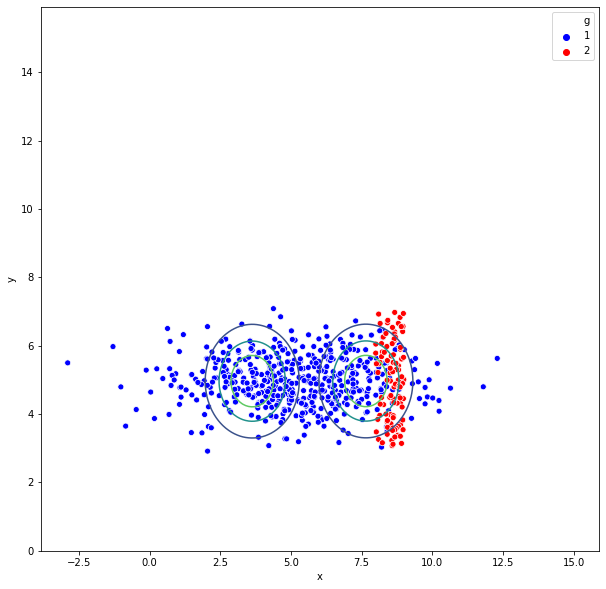

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot('x', 'y', hue='g',data=data, ax=ax, palette=['blue', 'red'])
plot_rings(means[0], [[1, 0],[0,1]], ax)
plot_rings(means[1], [[1, 0],[0,1]], ax)

In [5]:
demos = [
    [0,99],
    [100, 199],
    [200, 299],
    [300, 399],
    [400, 499],
    [500, 599]
]
model = MixtureOfGaussianDemonstrators(max_iter=10000).fit(data.drop(['d', 'g'], axis=1).to_numpy(), 2, demos)
cluster, log_like = model.results()

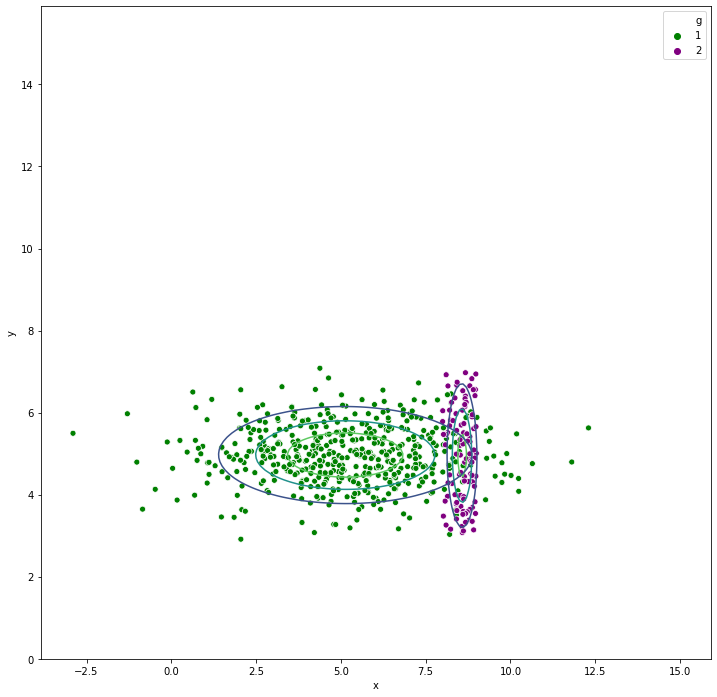

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot('x', 'y', hue='g',data=data, ax=ax, palette=['green', 'purple'])
plot_rings(cluster[0]['mu_k'], cluster[0]['cov_k'], ax)
plot_rings(cluster[1]['mu_k'], cluster[1]['cov_k'], ax)

In [7]:
len(log_like)

10001

In [8]:
cluster

[{'pi_k': 0.16666666666666666,
  'mu_k': array([array([8.57241995]), array([4.95458328])], dtype=object),
  'cov_k': array([[array([0.07928902]), array([-0.00710888])],
         [array([-0.00710888]), array([1.27108296])]], dtype=object),
  'gamma_k': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 